In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

tweets = pd.read_csv('csv/train.csv')
tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


Lleno los valores nulos con 'Not Especified' esto denotara que la keyword o la locacion no fueron especificadas en el tweet 

In [2]:
tweets = tweets.fillna(value= 'Not Especified')

In [3]:
tweets['cuantity'] = 1
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7613 non-null   object
 2   location  7613 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
 5   cuantity  7613 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 357.0+ KB


Creo una nueva columna en el df principal con la longitud del Tweet para relacionarlo posteriormente con la locacion

In [4]:
tweets['text lenght'] = tweets['text'].str.len()

In [5]:
tweets_by_loc = tweets[['location', 'target', 'text lenght', 'cuantity']]
tweets_by_loc = tweets_by_loc.groupby('location').sum()
tweets_by_loc.sample(n=10)

,target,text lenght,cuantity
location,,,
toronto Û¢ dallas,0,124,1
NYC :) Ex- #Islamophobe,2,408,3
"Aix-en-Provence, France",0,57,1
South of D.C.,1,115,1
global,1,79,1
Brizzle City !,1,140,1
"Rapid City, Black Hills, SD",1,130,1
"eBooks, North America",0,125,1
LA ??,0,39,1


In [6]:
tweets_by_loc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3342 entries,    to åø\_(?)_/åø
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   target       3342 non-null   int64
 1   text lenght  3342 non-null   int64
 2   cuantity     3342 non-null   int64
dtypes: int64(3)
memory usage: 104.4+ KB


In [7]:
#Calculo el factor de veracidad para cada tweet y lor ordeno por dicho factor en orden descendiente
tweets_by_loc['Veracidad'] = tweets_by_loc['target'] / tweets_by_loc['cuantity']
tweets_by_loc = tweets_by_loc.sort_values('Veracidad', ascending = False)
tweets_by_loc.tail(10)

,target,text lenght,cuantity,Veracidad
location,,,,
Pittsburgh PA,0,136,1,0.0
Pittsburgh,0,27,1,0.0
Pittsburgh,0,141,2,0.0
"Honolulu,Hawaii",0,48,1,0.0
BestCoast,0,114,1,0.0
Between Dire and Radiant,0,39,1,0.0
Between the worlds,0,70,1,0.0
Photo : Blue Mountains,0,139,1,0.0
Hooters on Peachtree,0,56,1,0.0


In [8]:
#Me quedo solo con las locaciones que tienen mas de 10 Tweets 
does_the_location_has_more_than_10_tweets = (tweets_by_loc['cuantity'] > 10)
locations_with_more_than_10_tweets = tweets_by_loc[does_the_location_has_more_than_10_tweets]
del locations_with_more_than_10_tweets['target']
#lar ordeno descendientemente por su factor de veracidad y reseteo el index a fines de poder graficar
locations_with_more_than_10_tweets = locations_with_more_than_10_tweets.sort_values('Veracidad', ascending =True)
locations_with_more_than_10_tweets = locations_with_more_than_10_tweets.reset_index()
locations_with_more_than_10_tweets.head(10)

,location,text lenght,cuantity,Veracidad
0,NYC,1406,12,0.166667
1,Everywhere,1335,15,0.200000
2,Florida,1540,14,0.214286
3,New York,9234,71,0.225352
4,Kenya,2635,20,0.250000
5,United Kingdom,1400,14,0.285714
6,"Los Angeles, CA",2969,26,0.307692
7,London,4820,45,0.355556
8,Chicago,1229,11,0.363636
9,Seattle,1392,11,0.363636


In [9]:
tweets_by_loc = tweets_by_loc.reset_index()
tweets_by_loc.tail()

,location,target,text lenght,cuantity,Veracidad
3337,Between Dire and Radiant,0,39,1,0.0
3338,Between the worlds,0,70,1,0.0
3339,Photo : Blue Mountains,0,139,1,0.0
3340,Hooters on Peachtree,0,56,1,0.0
3341,Edinburgh,0,482,4,0.0


In [10]:
#multiplico el factor de veracidad por 100 a fines de poder graficar, ahora es un porcentaje de veracidad
locations_with_more_than_10_tweets['Porcentaje De Veracidad'] = locations_with_more_than_10_tweets['Veracidad'] * 100

Text(0.5, 1.0, 'Top 10 Locaciones con Mayor Ratio de Tweets Veraces')

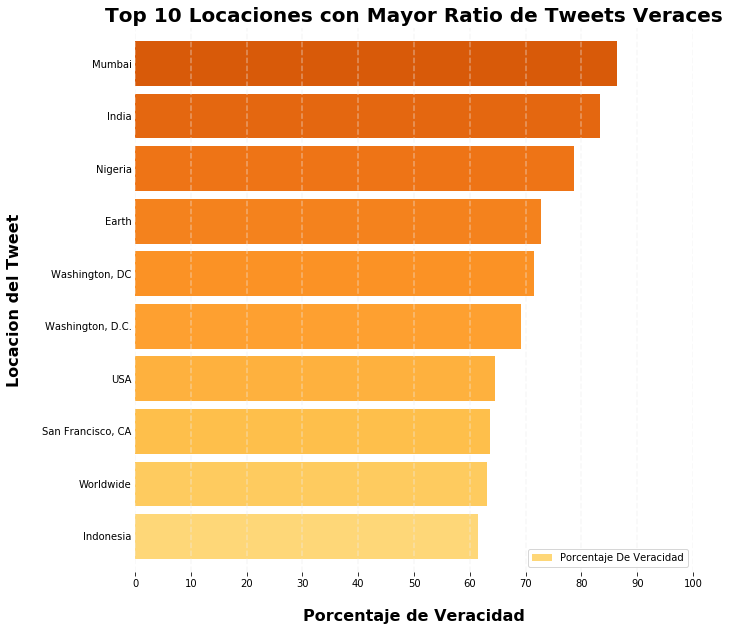

In [11]:

saltos = np.linspace(0.3, 0.7, 10)
colores = (cm.get_cmap('YlOrBr'))(saltos)
locations_with_more_than_10_tweets_plot = locations_with_more_than_10_tweets.tail(10).plot(kind='barh', y ='Porcentaje De Veracidad', x = 'location', figsize=(10,10), color=colores, width=0.85)

plt.xticks(np.arange(0, 100+1, 10.0))
plt.tick_params(axis='y', length=0)

locations_with_more_than_10_tweets_plot.spines['right'].set_visible(False)
locations_with_more_than_10_tweets_plot.spines['top'].set_visible(False)
locations_with_more_than_10_tweets_plot.spines['left'].set_visible(False)
locations_with_more_than_10_tweets_plot.spines['bottom'].set_visible(False)

lineas = locations_with_more_than_10_tweets_plot.get_xticks()
for i in lineas:
      locations_with_more_than_10_tweets_plot.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
locations_with_more_than_10_tweets_plot.set_xlabel("Porcentaje de Veracidad", labelpad=20, weight='bold', size=16)
locations_with_more_than_10_tweets_plot.set_ylabel("Locacion del Tweet", labelpad=20, weight='bold', size=16)
locations_with_more_than_10_tweets_plot.set_title("Top 10 Locaciones con Mayor Ratio de Tweets Veraces", weight='bold', size=20)


In [12]:
tweets_by_loc.head(10)

,location,target,text lenght,cuantity,Veracidad
0,,1,56,1,1.0
1,Melrose,1,129,1,1.0
2,"Minneapolis,MN,US",1,124,1,1.0
3,Minneapolis - St. Paul,1,86,1,1.0
4,Milton/Tallahassee,1,57,1,1.0
5,Midwestern USA,1,138,1,1.0
6,Midwest,4,502,4,1.0
7,Middle Earth / Asgard / Berk,1,132,1,1.0
8,"Miami,Fla",1,117,1,1.0
9,"Miami,FL",1,115,1,1.0


In [13]:
#me quedo con las 10 locaciones con mayor cantidad de Tweets verdaderos
top_10_tweets_by_loc = (tweets_by_loc.loc[:,'target'] >= 15)
top_10 = tweets_by_loc.loc[top_10_tweets_by_loc]
top_10.head(15)

,location,target,text lenght,cuantity,Veracidad
1199,Mumbai,19,2740,22,0.863636
1203,India,20,2470,24,0.833333
1209,Nigeria,22,3360,28,0.785714
1224,"Washington, DC",15,2430,21,0.714286
1265,USA,67,11285,104,0.644231
1278,UK,16,3133,27,0.592593
1283,United States,27,5001,50,0.540000
1429,Not Especified,1075,249413,2533,0.424398
1440,London,16,4820,45,0.355556
1498,New York,16,9234,71,0.225352


Text(0.5, 1.0, 'Top 10 de Locaciones con mayor cantidad de Tweets Verdaderos')

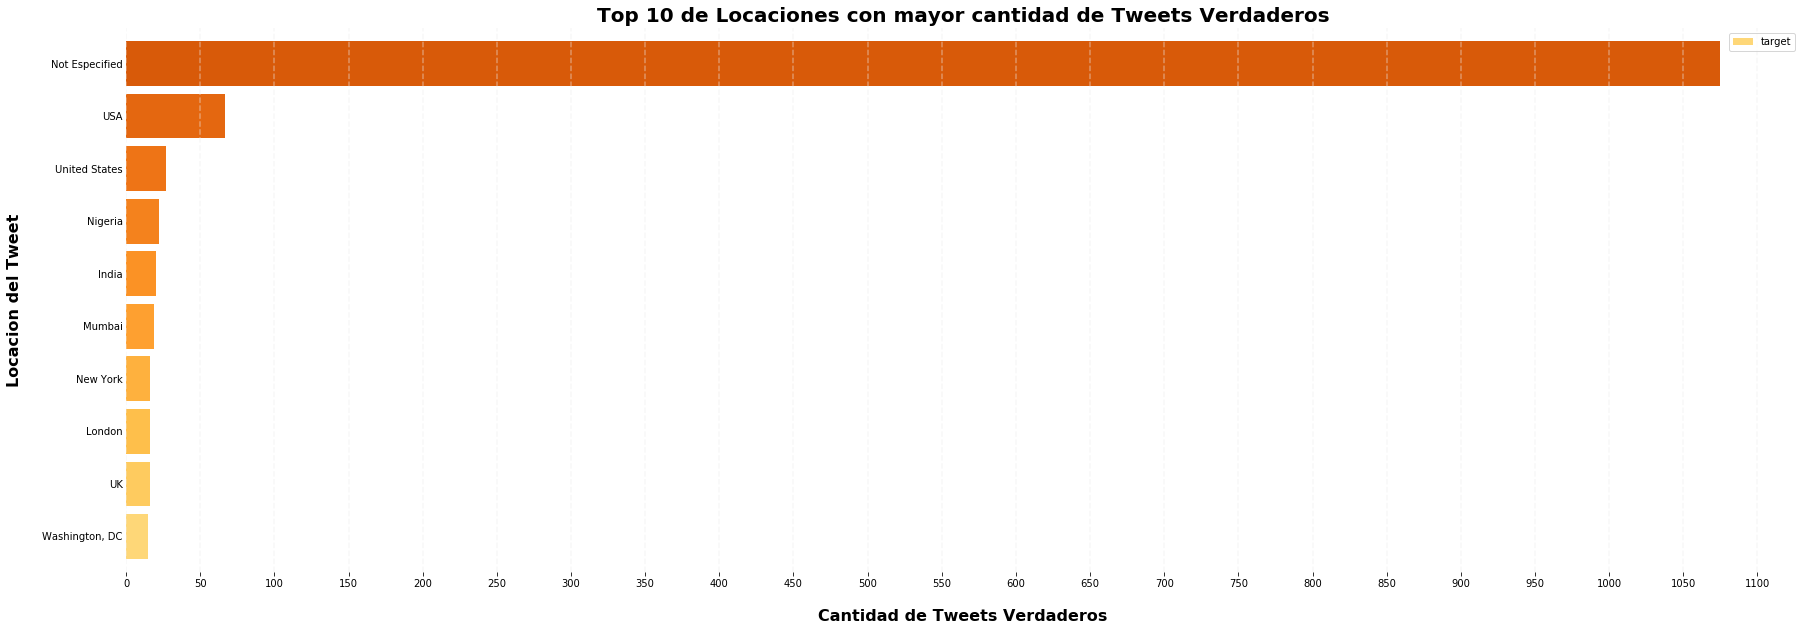

In [14]:
saltos = np.linspace(0.3, 0.7, 10)
colores = (cm.get_cmap('YlOrBr'))(saltos)
top_10 = top_10.sort_values('target')
top10_plot = top_10.plot(kind='barh', y ='target', x = 'location', figsize=(30,10), color=colores, width=0.85)

plt.xticks(np.arange(0, 1101, 50.0))
plt.tick_params(axis='y', length=0)

top10_plot.spines['right'].set_visible(False)
top10_plot.spines['top'].set_visible(False)
top10_plot.spines['left'].set_visible(False)
top10_plot.spines['bottom'].set_visible(False)

lineas = top10_plot.get_xticks()
for i in lineas:
      top10_plot.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
top10_plot.set_xlabel("Cantidad de Tweets Verdaderos", labelpad=20, weight='bold', size=16)
top10_plot.set_ylabel("Locacion del Tweet", labelpad=20, weight='bold', size=16)
top10_plot.set_title("Top 10 de Locaciones con mayor cantidad de Tweets Verdaderos", weight='bold', size=20)

In [15]:
#Creo una lista que para cada elemento del df responde a: es el elemento falso?
is_false = []
for item in tweets['target']:
    is_false.append(1 if item == 0 else 0)

    

In [16]:
false_tweets = tweets[['location', 'cuantity']] 
false_tweets['is false'] = is_false
false_tweets = false_tweets.groupby('location').sum()
false_tweets.sample(n=15)

/home/hugo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,cuantity,is false
location,,
wherever there's netflix,1,1
Pedophile hunting ground,6,1
"Alberta, VA",1,1
WORDLDWIDE,1,1
Two Up Two Down,1,1
"Orlando, Fl",2,2
Instagram: trillrebel_,1,1
Isle of Man,1,0
"Atlantic, IA",1,1


In [17]:
#calculo el porcentaje de tweets que son falsos del total de tweets para cada locacion
false_tweets['Porcentaje de Falsedad'] = (false_tweets['is false'] / false_tweets['cuantity']) *100
false_tweets.head(10)

,cuantity,is false,Porcentaje de Falsedad
location,,,
,1,0,0.0
Glasgow,1,1,100.0
"Melbourne, Australia",1,1,100.0
News,1,0,0.0
å_,1,1,100.0
45å¡ 5'12.53N 14å¡ 7'24.93E,1,1,100.0
"616 Û¢ Kentwood , MI",1,0,0.0
? ??????? ? ( ?? å¡ ? ? ? å¡),1,0,0.0
?currently writing a book?,1,1,100.0


In [18]:
#de las locaciones que tengoo me quedo solo con las que tienen mas de 10 Tweets 
has_more_tweets_than_10_tweets = (false_tweets['cuantity'] > 10)
locations_with_more_than_10_false_tweets = false_tweets[has_more_tweets_than_10_tweets]
locations_with_more_than_10_false_tweets = locations_with_more_than_10_false_tweets.sort_values('Porcentaje de Falsedad', ascending =True)
locations_with_more_than_10_false_tweets = locations_with_more_than_10_false_tweets.reset_index()
locations_with_more_than_10_false_tweets.head(10)

,location,cuantity,is false,Porcentaje de Falsedad
0,Mumbai,22,3,13.636364
1,India,24,4,16.666667
2,Nigeria,28,6,21.428571
3,Earth,11,3,27.272727
4,"Washington, DC",21,6,28.571429
5,"Washington, D.C.",13,4,30.769231
6,USA,104,37,35.576923
7,"San Francisco, CA",11,4,36.363636
8,Worldwide,19,7,36.842105
9,Indonesia,13,5,38.461538


Text(0.5, 1.0, 'Top 10 de Locaciones con Mayor Ratio de Tweets Falsos')

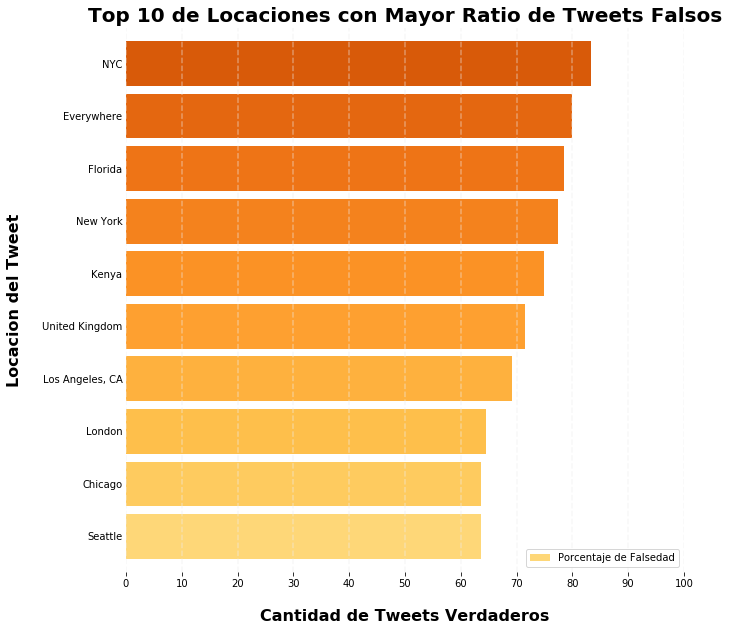

In [19]:
saltos = np.linspace(0.3, 0.7, 10)
colores = (cm.get_cmap('YlOrBr'))(saltos)
top10_plot = locations_with_more_than_10_false_tweets.tail(10).plot(kind='barh', y ='Porcentaje de Falsedad', x = 'location', figsize=(10,10), color=colores, width=0.85)

plt.xticks(np.arange(0, 101, 10.0))
plt.tick_params(axis='y', length=0)

top10_plot.spines['right'].set_visible(False)
top10_plot.spines['top'].set_visible(False)
top10_plot.spines['left'].set_visible(False)
top10_plot.spines['bottom'].set_visible(False)

lineas = top10_plot.get_xticks()
for i in lineas:
      top10_plot.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
top10_plot.set_xlabel("Cantidad de Tweets Verdaderos", labelpad=20, weight='bold', size=16)
top10_plot.set_ylabel("Locacion del Tweet", labelpad=20, weight='bold', size=16)
top10_plot.set_title("Top 10 de Locaciones con Mayor Ratio de Tweets Falsos", weight='bold', size=20)

In [20]:
#De las locaciones con mas de 10 tweets, calculo cual es el promedio de longitud del texto para cada locacion
locations_with_more_than_10_tweets['Longitud Promedio'] = locations_with_more_than_10_tweets['text lenght'] / locations_with_more_than_10_tweets['cuantity']
locations_with_more_than_10_tweets = locations_with_more_than_10_tweets.sort_values('Longitud Promedio')
locations_with_more_than_10_tweets.head()

,location,text lenght,cuantity,Veracidad,Porcentaje De Veracidad,Longitud Promedio
1,Everywhere,1335,15,0.200000,20.000000,89.000000
25,"San Francisco, CA",994,11,0.636364,63.636364,90.363636
11,Not Especified,249413,2533,0.424398,42.439795,98.465456
23,Indonesia,1292,13,0.615385,61.538462,99.384615
5,United Kingdom,1400,14,0.285714,28.571429,100.000000


Text(0.5, 1.0, 'Longitud Promedio de Tweets Por Locacion')

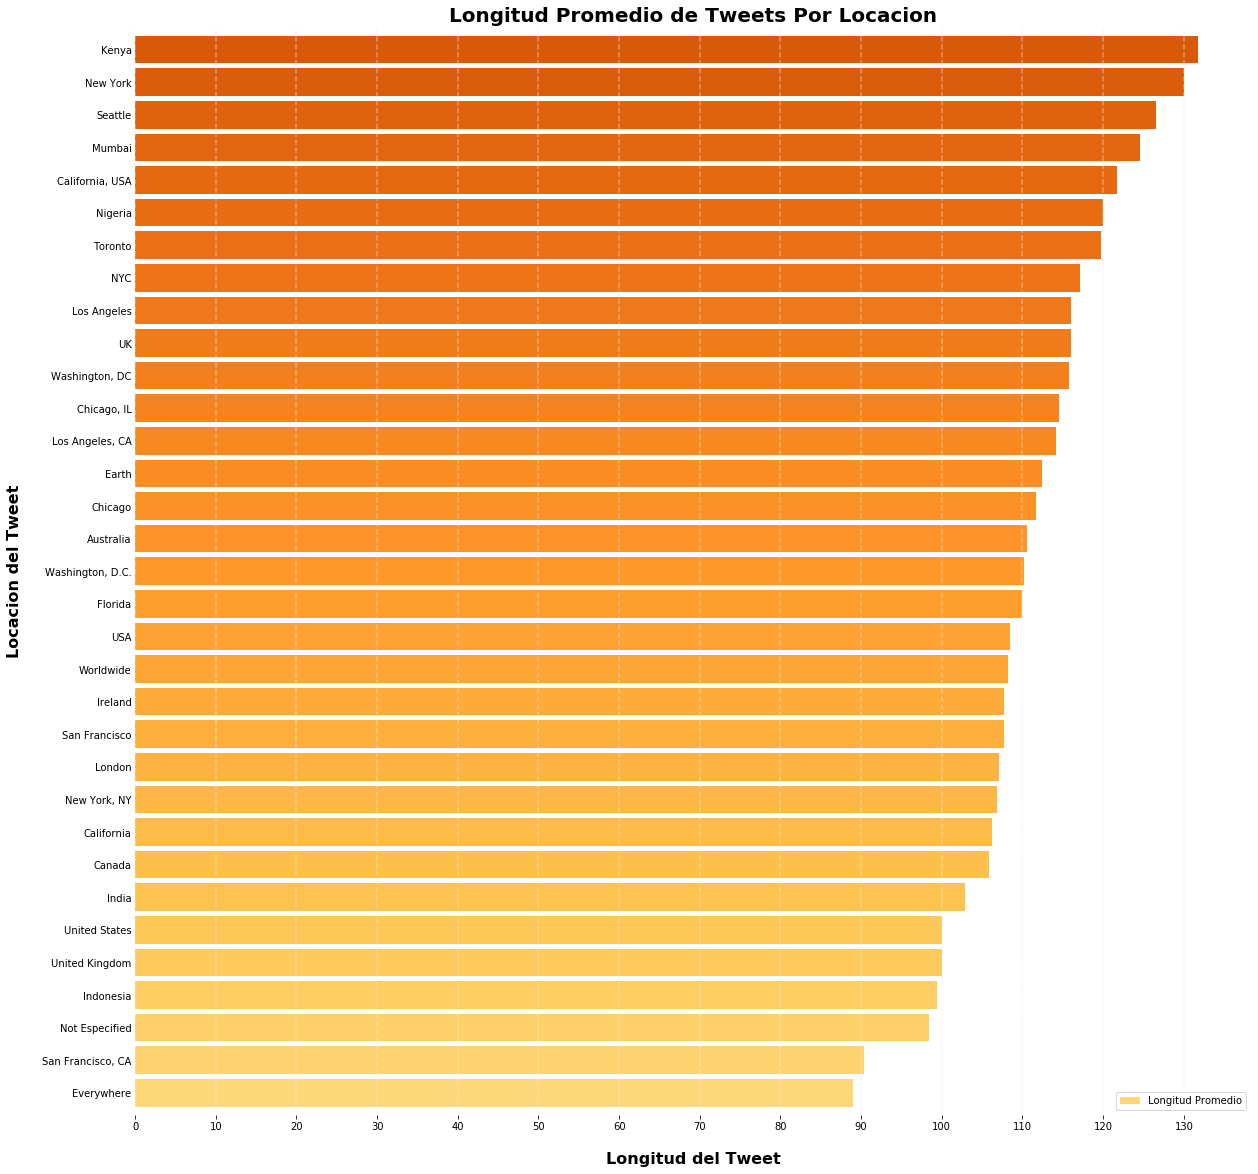

In [21]:
saltos = np.linspace(0.3, 0.7, 33)
colores = (cm.get_cmap('YlOrBr'))(saltos)
locations_with_more_than_10_tweets_plot = locations_with_more_than_10_tweets.plot(kind='barh', y ='Longitud Promedio', x = 'location', figsize=(20,20), color=colores, width=0.85)

plt.xticks(np.arange(0, 130+1, 10.0))
plt.tick_params(axis='y', length=0)

locations_with_more_than_10_tweets_plot.spines['right'].set_visible(False)
locations_with_more_than_10_tweets_plot.spines['top'].set_visible(False)
locations_with_more_than_10_tweets_plot.spines['left'].set_visible(False)
locations_with_more_than_10_tweets_plot.spines['bottom'].set_visible(False)

lineas = locations_with_more_than_10_tweets_plot.get_xticks()
for i in lineas:
      locations_with_more_than_10_tweets_plot.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
locations_with_more_than_10_tweets_plot.set_xlabel("Longitud del Tweet", labelpad=20, weight='bold', size=16)
locations_with_more_than_10_tweets_plot.set_ylabel("Locacion del Tweet", labelpad=20, weight='bold', size=16)
locations_with_more_than_10_tweets_plot.set_title("Longitud Promedio de Tweets Por Locacion", weight='bold', size=20)

In [22]:
#Creo un df en donde la columna de cantidad me indica las veces que aparecio cierta keyword y la ordeno descendentemente por las keywords que mas salieron
keywords_mas_usadas = tweets.groupby('keyword').sum().sort_values('cuantity', ascending = False).head(30)
keywords_mas_usadas = keywords_mas_usadas.reset_index()
keywords_mas_usadas.head()

,keyword,id,target,cuantity,text lenght
0,Not Especified,326326,42,61,4509
1,fatalities,233406,26,45,4864
2,deluge,133465,6,42,4669
3,armageddon,19748,5,42,4285
4,sinking,357380,8,41,4232


In [23]:
#creo una serie en la que me quedo solo con las 30 keywords mas usadas
keywords_mas_usadas_serie = pd.Series(keywords_mas_usadas['keyword'].values)
keywords_mas_usadas_serie

0     Not Especified
1         fatalities
2             deluge
3         armageddon
4            sinking
5             damage
6               harm
7        body%20bags
8           evacuate
9               fear
10          outbreak
11             siren
12           twister
13         windstorm
14          collided
15          sinkhole
16              sunk
17          hellfire
18            weapon
19           weapons
20            famine
21         explosion
22         whirlwind
23        earthquake
24        derailment
25          wreckage
26         collision
27            flames
28           wrecked
29         ambulance
dtype: object

In [24]:
cantidad_de_tweets_por_locacion = tweets.groupby('location').sum().sort_values('cuantity', ascending = False)
tiene_mas_de_10_tweets = (cantidad_de_tweets_por_locacion['cuantity'] > 10)
locaciones_con_mas_de_10_tweets = cantidad_de_tweets_por_locacion[tiene_mas_de_10_tweets]
locaciones_con_mas_de_10_tweets = locaciones_con_mas_de_10_tweets.reset_index()
locaciones_con_mas_de_10_tweets.head()

,location,id,target,cuantity,text lenght
0,Not Especified,13961318,1075,2533,249413
1,USA,618271,67,104,11285
2,New York,301155,16,71,9234
3,United States,304076,27,50,5001
4,London,248126,16,45,4820


In [25]:
#creo un df llamado scatter (para hacer un scatter plot) donde me quedo solo con los tweets que usan las 30 keywords mas usadas
does_tweet_has_frecuent_keyword = tweets['keyword'].isin(keywords_mas_usadas_serie)
scatter = tweets[does_tweet_has_frecuent_keyword]
scatter['keyword'].value_counts()

Not Especified    61
fatalities        45
armageddon        42
deluge            42
body%20bags       41
sinking           41
harm              41
damage            41
siren             40
windstorm         40
collided          40
twister           40
outbreak          40
evacuate          40
fear              40
sunk              39
derailment        39
flames            39
weapons           39
earthquake        39
whirlwind         39
weapon            39
collision         39
wrecked           39
sinkhole          39
famine            39
explosion         39
wreckage          39
hellfire          39
ambulance         38
Name: keyword, dtype: int64

In [26]:
#de los Tweets que tienen las keywords mas usadas me quedo solo con aquellos que tienen mas de 10 tweets
does_location_has_more_than_10_tweets = scatter['location'].isin(locaciones_con_mas_de_10_tweets['location'])
scatter = scatter[does_location_has_more_than_10_tweets]
del scatter['id']
del scatter['text lenght']
del scatter['target']
scatter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 545 entries, 0 to 7612
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   545 non-null    object
 1   location  545 non-null    object
 2   text      545 non-null    object
 3   cuantity  545 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 21.3+ KB


In [27]:
#los agrupo por location y keyword y sumo, con lo que consigo saber que tanto aparece cada par (locacion, keyword) 
scatter = scatter.groupby(['location', 'keyword']).sum().sort_values('cuantity', ascending=False)
scatter = scatter.reset_index()

Text(0, 0.5, 'Locacion')

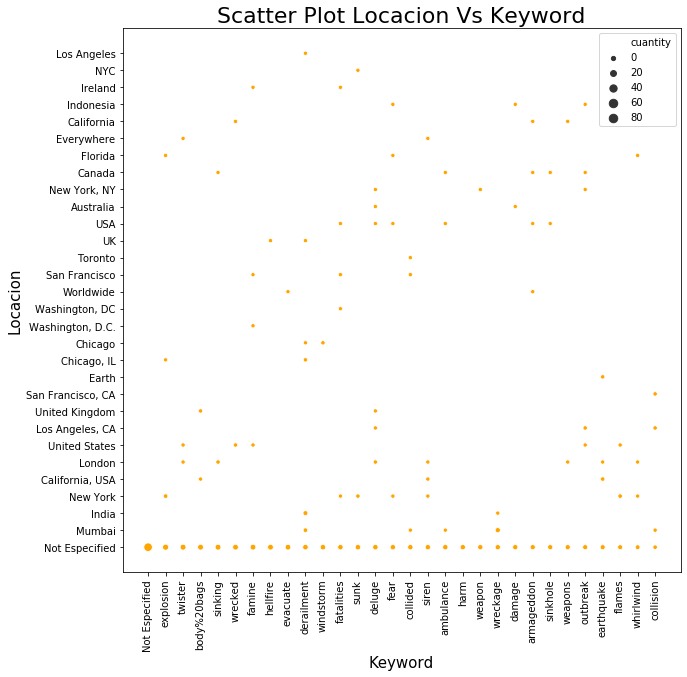

In [28]:
import seaborn as sns
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
g = sns.scatterplot(x = "keyword", y = "location", size='cuantity', color='orange',  data= scatter)
g.set_title("Scatter Plot Locacion Vs Keyword", fontsize=22)
g.set_xlabel("Keyword",fontsize=15)
g.set_ylabel("Locacion", fontsize=15)